In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#removing null values
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#spliting data to training and testing data


In [8]:
from sklearn.model_selection import train_test_split
#before we do the train test split we need to define what x and y are
#because this takes x & y and turns them to x train x test y train y test
#we are saying the x is data frame without the target variable
#said axis=1 cus we droped a callum
#y is the oppsite
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
#test size is how much of the value we are testing. the go to value is 20 %
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [12]:
#combine the X_train and y_train data into a single DataFrame
train_data = X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7392,-118.25,33.96,42.0,1326.0,295.0,918.0,258.0,2.3864,<1H OCEAN,98800.0
1308,-121.83,37.99,18.0,2741.0,449.0,1507.0,460.0,4.7566,INLAND,142500.0
1961,-120.70,38.75,19.0,2325.0,430.0,967.0,376.0,2.9000,INLAND,158700.0
19888,-119.16,36.28,18.0,2377.0,414.0,1359.0,424.0,4.4000,INLAND,79300.0
3102,-117.68,35.64,15.0,3253.0,573.0,1408.0,586.0,5.2043,INLAND,95700.0
...,...,...,...,...,...,...,...,...,...,...
16964,-122.31,37.53,41.0,1608.0,269.0,676.0,267.0,4.6125,NEAR OCEAN,361700.0
4984,-118.30,34.00,52.0,1296.0,246.0,853.0,238.0,3.0500,<1H OCEAN,111600.0
10207,-117.92,33.88,52.0,1270.0,276.0,609.0,211.0,3.7500,<1H OCEAN,232500.0
3705,-118.39,34.19,41.0,2000.0,485.0,1439.0,461.0,3.0491,<1H OCEAN,192000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

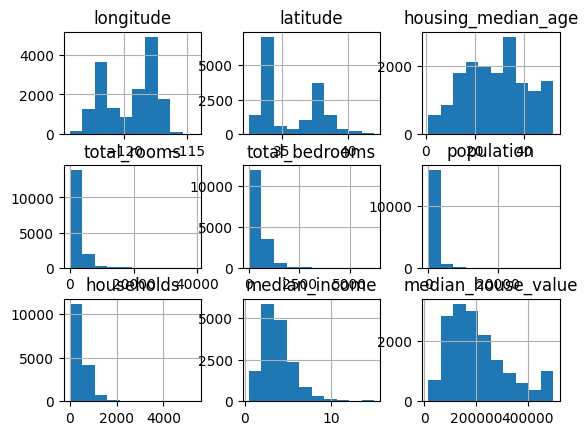

In [14]:
train_data.hist()


<Axes: >

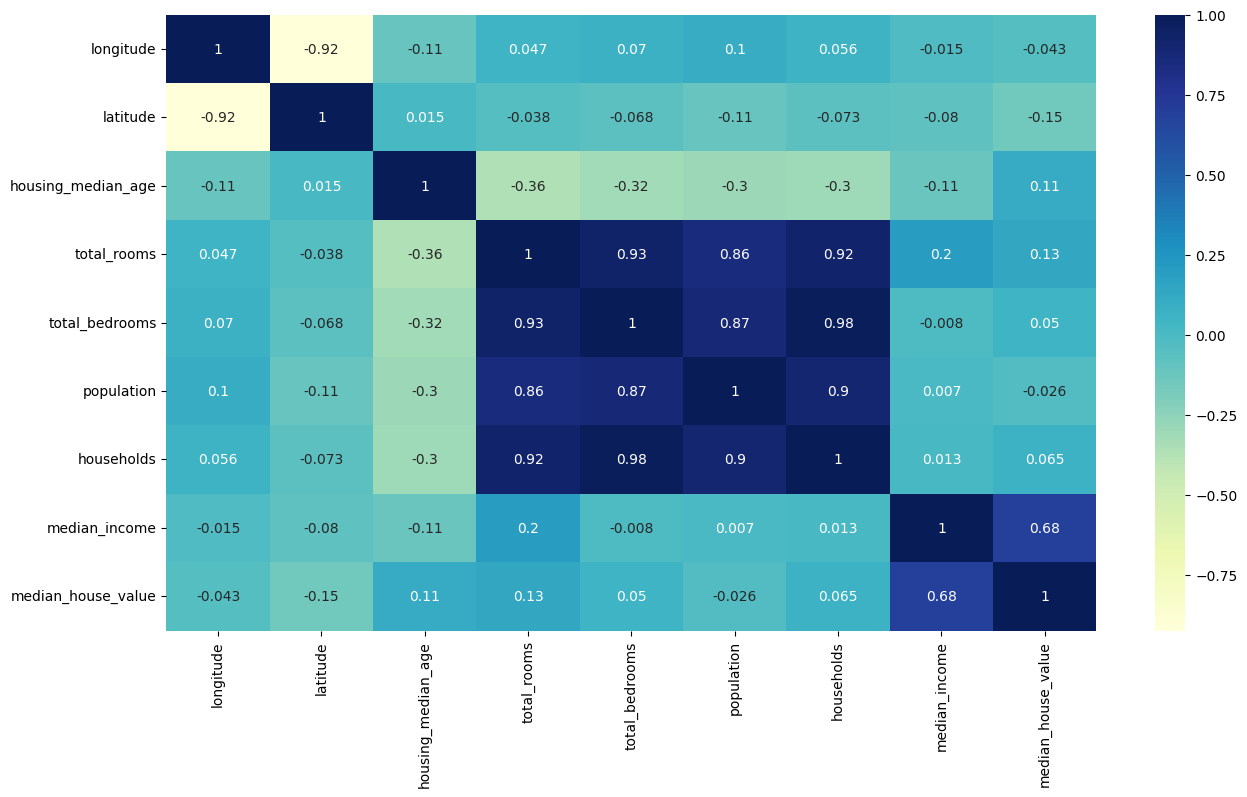

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

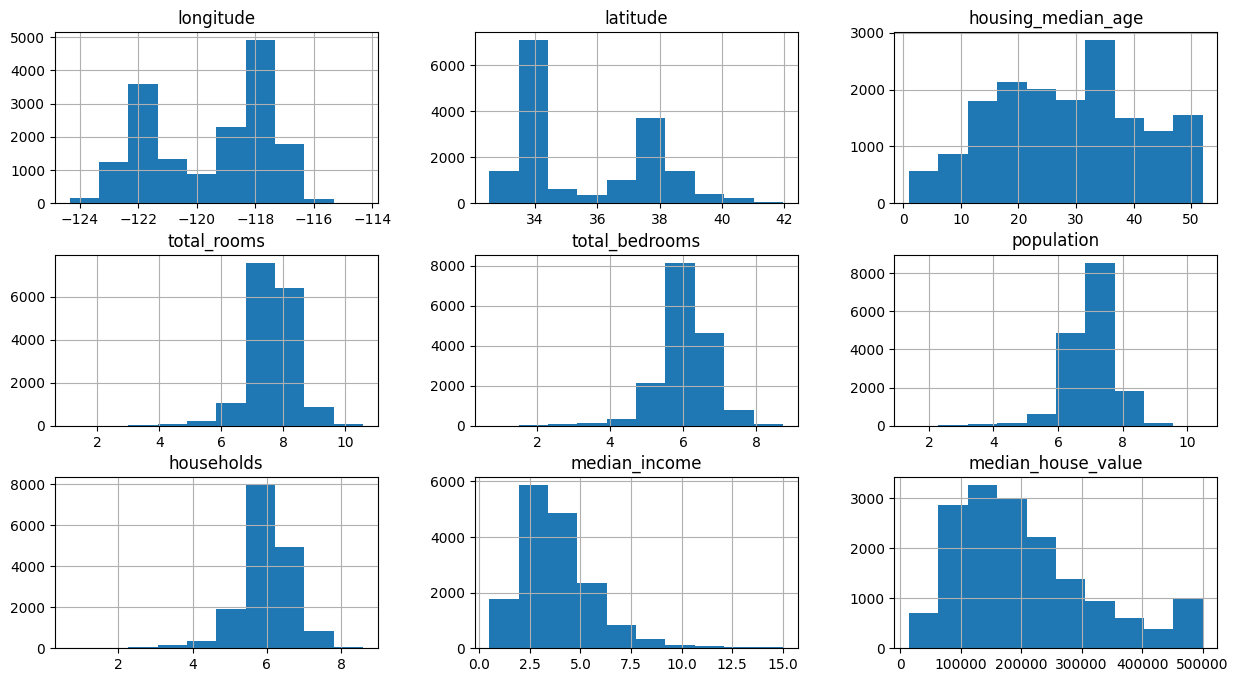

In [17]:
train_data.hist(figsize=(15,8))

In [18]:
#we turned ocean proximity into multiple features 
#features are true or false. exm: island false means its not an island
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7392,-118.25,33.96,42.0,7.190676,5.690359,6.823286,5.556828,2.3864,98800.0,True,False,False,False,False
1308,-121.83,37.99,18.0,7.916443,6.109248,7.318540,6.133398,4.7566,142500.0,False,True,False,False,False
1961,-120.70,38.75,19.0,7.751905,6.066108,6.875232,5.932245,2.9000,158700.0,False,True,False,False,False
19888,-119.16,36.28,18.0,7.774015,6.028279,7.215240,6.052089,4.4000,79300.0,False,True,False,False,False
3102,-117.68,35.64,15.0,8.087640,6.352629,7.250636,6.375025,5.2043,95700.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16964,-122.31,37.53,41.0,7.383368,5.598422,6.517671,5.590987,4.6125,361700.0,False,False,False,False,True
4984,-118.30,34.00,52.0,7.167809,5.509388,6.749931,5.476464,3.0500,111600.0,True,False,False,False,False
10207,-117.92,33.88,52.0,7.147559,5.624018,6.413459,5.356586,3.7500,232500.0,True,False,False,False,False
3705,-118.39,34.19,41.0,7.601402,6.186209,7.272398,6.135565,3.0491,192000.0,True,False,False,False,False


<Axes: xlabel='latitude', ylabel='longitude'>

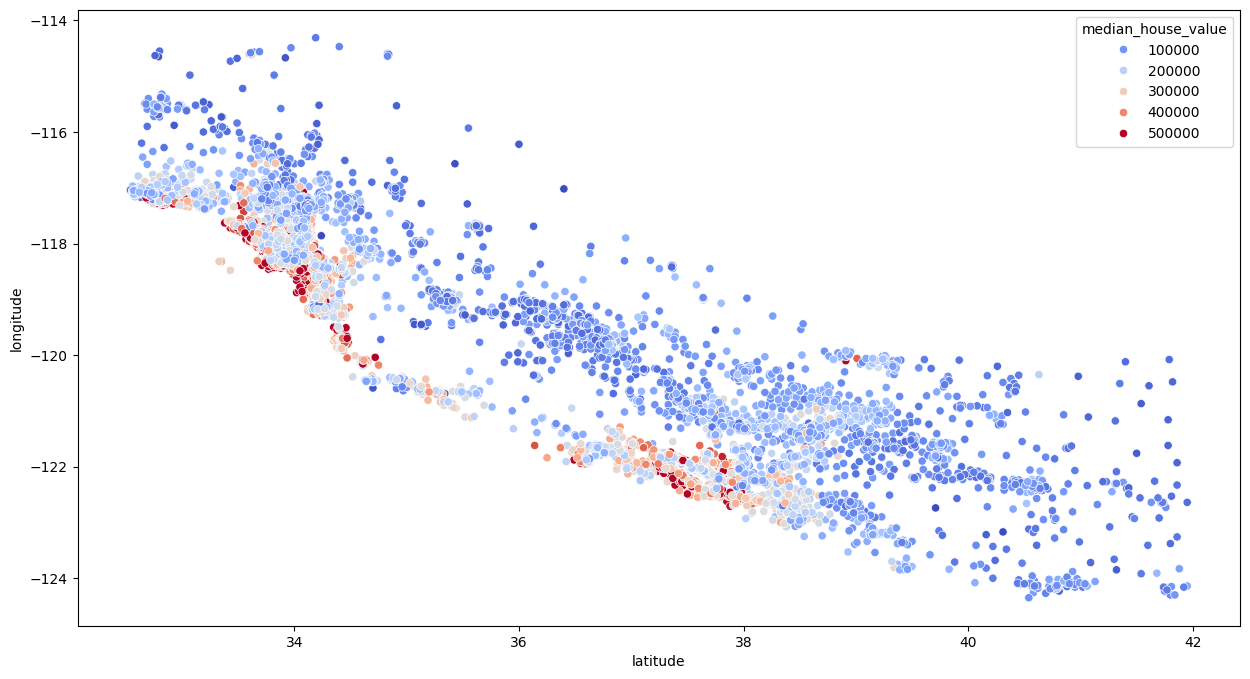

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm" )

In [21]:
#feature engenearing 
#how many of rooms are bedrooms
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<Axes: >

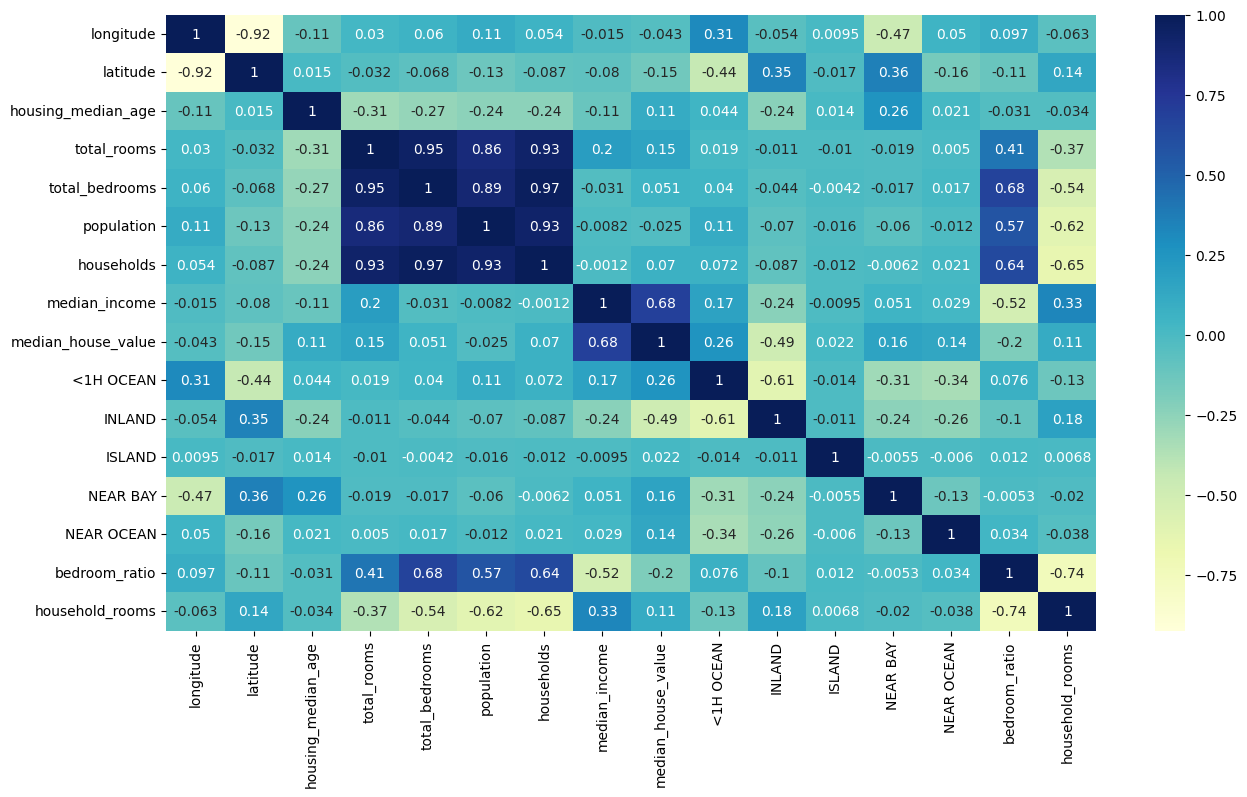

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [23]:
from sklearn.linear_model import LinearRegression


X_train, y_train = train_data.drop(['median_house_value'] ,axis=1), train_data['median_house_value']                                                                           

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [24]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [25]:
X_test, y_test = test_data.drop(['median_house_value'] ,axis=1), test_data['median_house_value']

In [27]:
reg.score(X_test, y_test)

0.6851715814368897

In [29]:
#importing a new module to see if we get better score
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
forest.score(X_test, y_test)

0.822756193539675

In [ ]:
#and we did get better score.(80%)

In [31]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
best_forest = grid_search.best_estimator_

In [34]:
best_forest.score(X_test, y_test)

0.8238738365109419

In [ ]:
#you dont always get better results with this